In [1]:


# Regular EDA (Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook 
%matplotlib inline 

#model from scikit-learn look at map and choses
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


#model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay


In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Satistics

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Kmeans Clustering

In [18]:
# culster column Annual Income and Spending Score

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [21]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [22]:
from sklearn.cluster import KMeans

In [25]:
# Fit model. check defualt on click shift+tap what clustering on pur data
k_mean =KMeans()
k_mean = KMeans().fit(x)

/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
# predict it 
k_mean.fit_predict(x) # this is 8 clister by defualt = in array had index 0-7 total = 8

/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 1, 6, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 7, 1, 1, 7, 7, 1, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 5, 0, 7, 0, 5, 0, 5, 0,
       7, 0, 5, 0, 5, 0, 5, 0, 5, 0, 7, 0, 5, 0, 7, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 7, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

# Elbow Method to find optimal number of clusters
wcaa(within clusters sum of square) sum of squre by different values of cluster

In [28]:
# make k_mean run 1 to 10 with within cluster sum of square wzss

wcss=[]
for i in range(1,11):
    k_mean = KMeans(n_clusters=i)
    k_mean.fit(x)
    wcss.append(k_mean.inertia_)

/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

In [29]:
# wcaa sum of squre by different values of cluster
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 31280.903845940935,
 25094.432930794694,
 22830.10333064868,
 19664.685196005546]

Text(0, 0.5, 'WCSS')

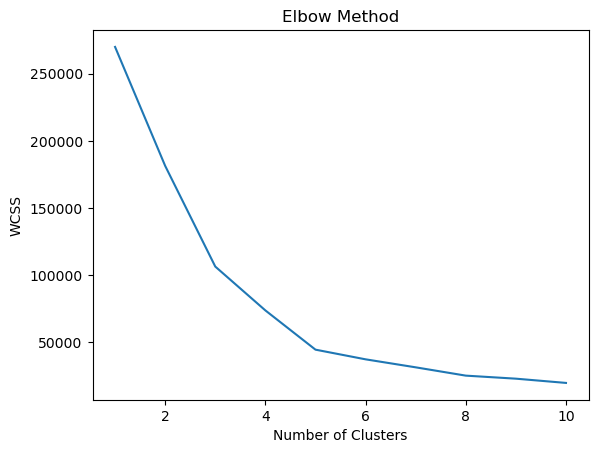

In [32]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

## The optimal number are 5 since graph strong decressing until the Elbow point aound 5 and sslowly decressing. So consider Elobow medthod and Cluster = 5

# Modeling Training
After find the cluster number = 5 we can fit model

In [36]:
k_mean = KMeans(n_clusters=5,random_state=42)
model_k = k_mean.fit_predict(x)

/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
model_k

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

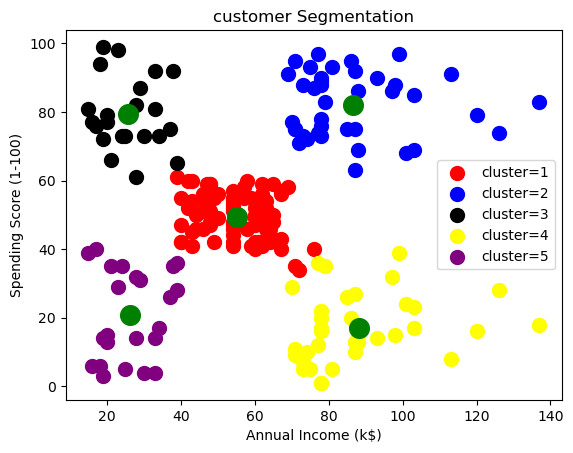

In [43]:
# pass [row,colums]
# x exis = (x.iloc[model_k == 0,0] select 0 customer which is cluster group 0 
# y exis = x.iloc[model_k==0,1]  select 0

#, size of point = 100 

plt.scatter(x.iloc[model_k == 0,0],x.iloc[model_k==0,1],s=100, c='red',label='cluster=1') # (x,y) in cluster 1
plt.scatter(x.iloc[model_k == 1,0],x.iloc[model_k==1,1],s=100, c='blue',label='cluster=2')#(x,y) in cluster 2
plt.scatter(x.iloc[model_k == 2,0],x.iloc[model_k==2,1],s=100, c='black',label='cluster=3')#(x,y) in cluster3
plt.scatter(x.iloc[model_k == 3,0],x.iloc[model_k==3,1],s=100, c='yellow',label='cluster=4')#(x,y) in cluster 4
plt.scatter(x.iloc[model_k == 4,0],x.iloc[model_k==4,1],s=100, c='purple',label='cluster=5')#(x,y) in cluster5
#display cluster centroid using k_mean
plt.scatter(k_mean.cluster_centers_[:,0],k_mean.cluster_centers_[:,1],s=200, c="green")
plt.title("customer Segmentation")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()


#### *For the analyst High Annual Income spending less , but low Annual Income speding the most which is cluster 3 and 5 in order.*

# Perform perdiction by input the values

In [44]:
k_mean.predict([[18,50]])

/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

#### array[4] = cluster 5 (the most spending score group)

In [48]:
import joblib
joblib.dump(k_mean, "customer_segementation")

['customer_segementation']

In [49]:
model = joblib.load("customer_segementation")

In [50]:
model.predict([[45,67]])

/Users/m1.thibsuda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

# Graphical User Interface

In [52]:
from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model = joblib.load('customer_segmentation')
    result=model.predict([[p1,p2]])
    print("This Customer belongs to cluster no: ", result[0])
    
    if result[0] == 0:
        Label(master, text="Customers with medium annual income and medium annual spend").grid(row=31)
    elif result[0]==1:
        Label(master, text="Customers with high annual income but low annual spend").grid(row=31)
    elif result[0]==2:
        Label(master, text="Customers with low annual income and low annual spend").grid(row=31)
    elif result[0]==3:
        Label(master, text="Customers low annual income but high annual spend").grid(row=31)
    elif result[0]==4:
        Label(master, text="Customers with high annual income and high annual spend").grid(row=31)

master = Tk()
master.title("Customer Segmentation Using Machine Learning")


label = Label(master, text = "Customer Segmentation Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master,text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)


e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()